In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


Read data


In [210]:
df = pd.read_csv('titanic.csv')
df = df.drop(columns=['PassengerId', 'Pclass', 'Name', 'Sex',
             'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [211]:
df.isnull().sum()


Survived      0
Age         177
Fare          0
dtype: int64

# Bài 1


In [212]:
result = np.zeros((14, 11))
index = 0


In [213]:
def logistic_regression(titanic_data, test_size=0.3, random_state=0):
    X = titanic_data.drop(columns='Survived', axis=1)
    Y = titanic_data['Survived']

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=test_size, random_state=random_state)
    # print(X.shape, X_train.shape, X_test.shape)

    model = LogisticRegression()
    model.fit(X_train, Y_train)

    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    # print('Accuracy score of training data : ', training_data_accuracy)

    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
    # print('Accuracy score of test data : ', test_data_accuracy)
    return test_data_accuracy


In [214]:
def write_result(titanic_data):
    global index
    for i in range(10):
        result[index][i] = logistic_regression(
            titanic_data=titanic_data, random_state=i)
    result[index][10] = np.mean(result[index][0:9])
    index += 1


In [215]:
def outliers(titanic_data):
    lower_boundary = titanic_data['Age'].mean() - 3 * titanic_data['Age'].std()
    upper_boundary = titanic_data['Age'].mean(
    ) + 3 * titanic_data['Age'].std()
    titanic_data.loc[titanic_data['Age'] >= int(
        upper_boundary), 'Age'] = int(upper_boundary)

    IQR = titanic_data.Fare.quantile(0.75) - titanic_data.Fare.quantile(0.25)
    lower_bridge = titanic_data['Fare'].quantile(0.25) - (IQR*3)
    upper_bridge = titanic_data['Fare'].quantile(0.75) + (IQR*3)
    titanic_data.loc[titanic_data['Fare'] >= int(
        upper_bridge), 'Fare'] = int(upper_bridge)

    return titanic_data


In [216]:
def plotFigure(titanic_data: pd.DataFrame, text: str):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df['Age'].plot(kind='kde', color='blue')
    titanic_data['Age'].plot(kind='kde', color='red')
    lines, _ = ax.get_legend_handles_labels()
    labels = ['Age', text]
    ax.legend(lines, labels, loc='best')

## Mean


In [217]:
titanic_data = df.copy()
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data.isnull().sum()


Survived    0
Age         0
Fare        0
dtype: int64

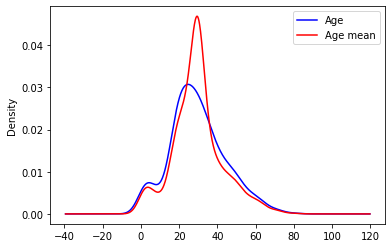

In [218]:
plotFigure(titanic_data, 'Age mean')

In [219]:
write_result(titanic_data)
titanic_data = outliers(titanic_data)
write_result(titanic_data)


In [220]:
# plotFigure('Age mean outliers')

## Median


In [221]:
titanic_data = df.copy()
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data.isnull().sum()


Survived    0
Age         0
Fare        0
dtype: int64

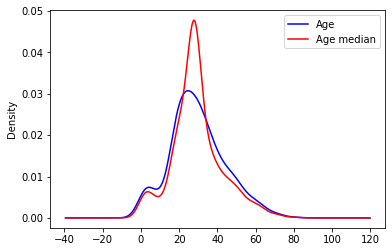

In [222]:
plotFigure(titanic_data, 'Age median')

In [223]:
write_result(titanic_data)
titanic_data = outliers(titanic_data)
write_result(titanic_data)


## Mode


In [224]:
titanic_data = df.copy()
titanic_data['Age'].fillna(titanic_data['Age'].mode()[0], inplace=True)
titanic_data.isnull().sum()


Survived    0
Age         0
Fare        0
dtype: int64

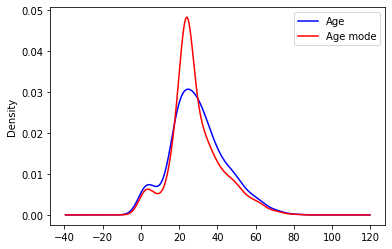

In [225]:
plotFigure(titanic_data, 'Age mode')

In [226]:
write_result(titanic_data)
titanic_data = outliers(titanic_data)
write_result(titanic_data)


## Random


In [227]:
titanic_data = df.copy()
random_samples = titanic_data['Age'].dropna().sample(
    n=titanic_data['Age'].isnull().sum(), random_state=0)
random_samples.index = titanic_data[titanic_data['Age'].isnull()].index
titanic_data.loc[titanic_data['Age'].isnull(), 'Age'] = random_samples
titanic_data.isnull().sum()


Survived    0
Age         0
Fare        0
dtype: int64

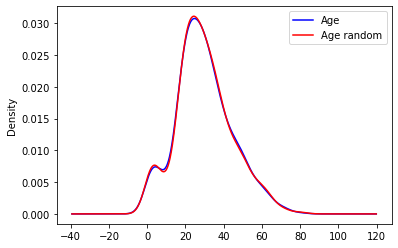

In [228]:
plotFigure(titanic_data, 'Age random')

In [229]:
write_result(titanic_data)
titanic_data = outliers(titanic_data)
write_result(titanic_data)


## End of dist


In [230]:
titanic_data = df.copy()
extreme = titanic_data.Age.mean() + 3*titanic_data.Age.std()
titanic_data['Age'] = titanic_data['Age'].fillna(extreme)
titanic_data.isnull().sum()


Survived    0
Age         0
Fare        0
dtype: int64

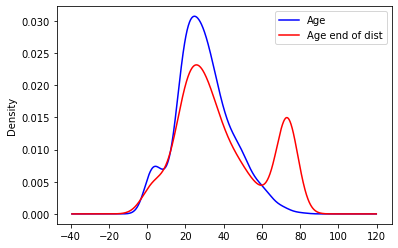

In [231]:
plotFigure(titanic_data, 'Age end of dist')

In [232]:
write_result(titanic_data)
titanic_data = outliers(titanic_data)
write_result(titanic_data)


## Arbitrary value


In [233]:
value = 50
titanic_data = df.copy()
titanic_data['Age'] = titanic_data['Age'].fillna(value)
titanic_data.isnull().sum()


Survived    0
Age         0
Fare        0
dtype: int64

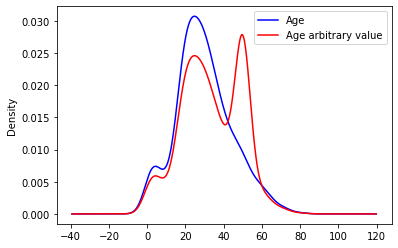

In [234]:
plotFigure(titanic_data, 'Age arbitrary value')

In [235]:
write_result(titanic_data)
titanic_data = outliers(titanic_data)
write_result(titanic_data)


## New feature


In [236]:
titanic_data = df.copy()
titanic_data['Age_NAN'] = np.where(titanic_data['Age'].isnull(), 1, 0)
titanic_data['Age'].fillna(titanic_data.Age.median(), inplace=True)
titanic_data.isnull().sum()


Survived    0
Age         0
Fare        0
Age_NAN     0
dtype: int64

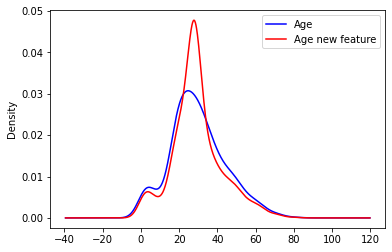

In [237]:
plotFigure(titanic_data, 'Age new feature')


In [238]:
write_result(titanic_data)
titanic_data = outliers(titanic_data)
write_result(titanic_data)


In [239]:
result_df = pd.DataFrame(result, index=['Mean', 'Mean outliers', 'Median', 'Median outliers', 'Mode', 'Mode outliers',
                                        'Random', 'Random outliers', 'End of dist', 'End of dist outliers', 'Arbitrary value',
                                        'Arbitrary value outliers', 'New feature', 'New feature outliers'],
                         columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Mean'])
result_df


,0,1,2,3,4,5,6,7,8,9,Mean
Mean,0.686567,0.619403,0.656716,0.641791,0.675373,0.645522,0.686567,0.630597,0.656716,0.630597,0.655473
Mean outliers,0.697761,0.623134,0.686567,0.623134,0.667910,0.694030,0.712687,0.660448,0.667910,0.638060,0.670398
Median,0.686567,0.623134,0.656716,0.645522,0.675373,0.638060,0.682836,0.634328,0.656716,0.634328,0.655473
Median outliers,0.701493,0.623134,0.682836,0.623134,0.667910,0.694030,0.712687,0.660448,0.667910,0.638060,0.670398
Mode,0.694030,0.623134,0.649254,0.641791,0.679104,0.649254,0.679104,0.623134,0.656716,0.638060,0.655058
Mode outliers,0.694030,0.626866,0.686567,0.623134,0.656716,0.694030,0.705224,0.660448,0.667910,0.638060,0.668325
Random,0.694030,0.626866,0.656716,0.626866,0.679104,0.652985,0.682836,0.626866,0.660448,0.638060,0.656302
Random outliers,0.701493,0.638060,0.686567,0.615672,0.664179,0.697761,0.705224,0.664179,0.667910,0.634328,0.671227
End of dist,0.694030,0.630597,0.664179,0.626866,0.701493,0.671642,0.697761,0.638060,0.667910,0.645522,0.665837
End of dist outliers,0.701493,0.630597,0.682836,0.623134,0.656716,0.679104,0.705224,0.671642,0.667910,0.645522,0.668740


Kết luận: Độ chính xác trung bình cao nhất là 0.671227 trong trường hợp xử lí dữ liệu có xử lí ngoại lệ bằng phương pháp random với random state bằng 0; thấp nhất là 0.655058 trong trường hợp xử lí dữ liệu bằng mode.


# Bài 2


In [240]:
def calculate_test_accuracy_mean(df):
    temp = np.zeros(10)
    for i in range(10):
        temp[i] = logistic_regression(titanic_data=df, random_state=i)
    return temp.mean()


## Standard Scale


In [241]:
scaled_df = df.copy()
scaled_df.isnull().sum()


Survived      0
Age         177
Fare          0
dtype: int64

In [242]:
scaled_df = outliers(scaled_df)

random_samples = scaled_df['Age'].dropna().sample(
    n=scaled_df['Age'].isnull().sum(), random_state=0)
random_samples.index = scaled_df[scaled_df['Age'].isnull()].index
scaled_df.loc[scaled_df['Age'].isnull(), 'Age'] = random_samples
scaled_df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

Standard Scale data


In [243]:
standard_scaler = StandardScaler()
scaled_arr = standard_scaler.fit_transform(scaled_df[['Age', 'Fare']])
scaled_df = pd.DataFrame(scaled_arr, columns=['Age', 'Fare'])
scaled_df['Survived'] = df['Survived']


In [244]:
calculate_test_accuracy_mean(scaled_df)


0.6682835820895522

Nhận xét: Sau khi áp dụng chuẩn hóa dữ liệu Z-score, độ chính xác hồi quy logistic trung bình bị giảm đi 0.2943%


## Minmax scale data


In [245]:
minmax_df = df.copy()
minmax_df.isnull().sum()


Survived      0
Age         177
Fare          0
dtype: int64

In [246]:
minmax_df = outliers(minmax_df)

random_samples = minmax_df['Age'].dropna().sample(
    n=minmax_df['Age'].isnull().sum(), random_state=0)
random_samples.index = minmax_df[minmax_df['Age'].isnull()].index
minmax_df.loc[minmax_df['Age'].isnull(), 'Age'] = random_samples
minmax_df.isnull().sum()


Survived    0
Age         0
Fare        0
dtype: int64

In [247]:
minmax_scaler = MinMaxScaler()
minmax_df = pd.DataFrame(
    minmax_scaler.fit_transform(minmax_df), columns=df.columns)
minmax_df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [248]:
calculate_test_accuracy_mean(minmax_df)


0.6686567164179105

Nhận xét: Sau khi áp dụng chuẩn hóa dữ liệu minmax, độ chính xác hồi quy logistic trung bình bị giảm đi 0.257%


Nhận xét chung: Sau khi áp dụng 2 phương pháp chuẩn hóa dữ liệu, ta thấy độ chính xác không tăng lên mà còn bị giảm (giảm không đáng kể (<1%))